In [1]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
odor = pd.read_json('Data/odor_prop.json', lines=False, orient='records')

In [3]:
odor=odor[odor['level']=='first']
odor.reset_index(drop=True, inplace=True)

In [4]:
mol=odor['cid'].value_counts()
mols=mol.index[mol>1]

In [5]:
groups=[]
for i in range(len(odor)):
    for mol in mols:
        if odor['cid'][i] == mol:
            g=np.max(odor[odor['cid']==mol]['label'])
            groups.append([mol, g])

In [6]:
ls_drop=[]
for mol in groups:
    for i in range(len(odor)):
        if (odor['cid'][i] == mol[0]):
            if odor['label'][i]!=mol[1]:
                ls_drop.append(i)

In [11]:
odor=odor.drop(ls_drop)
odor.reset_index(drop=True, inplace=True)

In [28]:
odor = odor.sort_values(by='cid')
odor.reset_index(inplace=True)

In [30]:
ls_repeat=[]
for i in range(len(odor)-1):
    if (odor['cid'][i]==odor['cid'][i+1]):
        ls_repeat.append(i)

In [32]:
odor=odor.drop(ls_repeat)
odor.reset_index(drop=True, inplace=True)

In [33]:
odor

,index,name,level,cid,label,smiles,TPSA,MolLogP,MolWt,ExactMolWt,...,Class,Subclass,Intermediate Nodes,Direct Parent,Alternative Parents,Molecular Framework,Substituents,Structure-based description,Ancestors,External Descriptors
0,2210,fruity,first,49,4,CC(C)C(=O)C(=O)O,54.37,0.29610,116.116,116.047344,...,None,None,None,None,None,None,None,None,None,None
1,3245,caramellic,first,58,5,CCC(=O)C(=O)O,54.37,0.05010,102.089,102.031694,...,None,None,None,None,None,None,None,None,None,None
2,2054,fruity,first,70,4,CC(C)CC(=O)C(=O)O,54.37,0.68620,130.143,130.062994,...,None,None,None,None,None,None,None,None,None,None
3,1034,phenolic,first,72,6,C1=CC(=C(C=C1C(=O)O)O)O,77.76,0.79600,154.121,154.026609,...,None,None,None,None,None,None,None,None,None,None
4,2696,fatty,first,107,4,C1=CC=C(C=C1)CCC(=O)O,37.30,1.70380,150.177,150.068080,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3383,3232,caramellic,first,90479169,5,CCOC(=O)C1=C(OC(=C1O)C)C,59.67,1.77874,184.191,184.073559,...,None,None,None,None,None,None,None,None,None,None
3384,2784,fatty,first,92043681,4,CCCCCCCCCC(=O)CC(=O)O.CC(CO)[O-],97.66,1.89840,289.392,289.202048,...,None,None,None,None,None,None,None,None,None,None
3385,2783,fatty,first,92256353,4,CC(=O)CC[C@H]1C(=C)CCCC1(C)C,17.07,3.73810,194.318,194.167065,...,None,None,None,None,None,None,None,None,None,None
3386,1863,fruity,first,101306697,4,C[C@@H]1CC[C@H]([C@]12CCC(=CC2)C)C(C)(C)O,20.23,3.92000,222.372,222.198365,...,None,None,None,None,None,None,None,None,None,None


In [51]:
ind_X=odor.columns[6:59]

In [52]:
X = odor[ind_X]
y = odor['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

<AxesSubplot:xlabel='label', ylabel='count'>

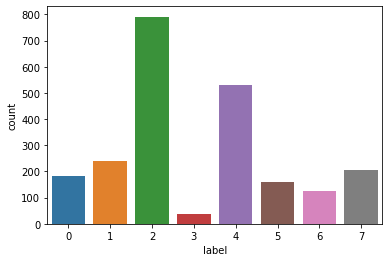

In [53]:
sns.countplot(y_train)

<AxesSubplot:xlabel='label', ylabel='count'>

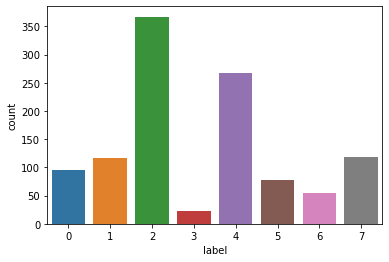

In [54]:
sns.countplot(y_test)

In [55]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [56]:
import warnings
warnings.filterwarnings("ignore")
acc=0
for i in range(len(X_train)):
    a = clf.predict(np.array(X_train.iloc[i]).reshape(1, -1))
    b = y_train.iloc[i]
    if (a==[b]):
        acc+=1
print('Accuracy is:', acc/len(X_train))

Accuracy is: 0.49272807404142793


<AxesSubplot:xlabel='cid', ylabel='TPSA'>

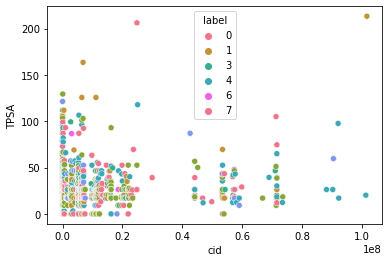

In [59]:
sns.scatterplot(x="cid", y="TPSA", hue="label", data=odor, hue_order= ['u', 'g', 'r', 'i', 'z'], palette='husl')